In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import eigvals, svd

#### Задание 1

In [3]:
def matrix_generate(rows, columns, type_ = "full", eps = 0, rank = None):
    """
    matrix_generate(rows, columns, type_ = "full")

    Создаёт случайную матрицу выбранного типа.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".

    Parameters
    ----------

    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "symmetric", "diagonal", "lower_triangular", "singular", "stepped", "disturbed"
    eps: float, optional0
        Дополнительное число, использующееся при генерации для некоторых типов матриц.
    rank: int
        Ранг создаваемой матрицы

    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.

    Notes
    -----
    Поддерживаемые типы матриц:
        "full","upper_triangular",
        "symmetric", "diagonal", 
        "lower_triangular", "singular", 
        "stepped", "disturbed"
        ...


    """
    A = None

    if type_ == "full":

        A = np.random.random(size=(rows, columns))

    elif type_ == "upper_triangular":

            A = np.triu(np.random.random(size=(rows, columns)))

    elif type_ == "lower_triangular":
            
            A = np.tril(np.random.random(size=(rows, columns)))
        
    elif type_ == "diagonal":
        
        if rows != columns:
            raise TypeError( f"Error with type {type_} and shape ({rows},{columns})")
        
        else: 
            A = np.diag(np.random.random(size = rows))

    elif type_ == "symmetric":

        if rows != columns:
            raise TypeError( f"Error with type {type_} and shape ({rows},{columns})")

        else:
            A = np.triu(np.random.random(size=(rows, columns)))
            A += (A.T - np.diag(np.diag(A)))
            
    elif type_ == "singular":
         
         A = np.random.random(size = (rows, columns))
         A[-1, :] = 0


    elif type_ == "stepped":

        if not rank:
            return 1
        
        elif rank > rows or rank > columns or rows != columns:
            raise TypeError(f"Error with type {type_}, shape ({rows},{columns}) and rank {rank}")
    
        else:
            A = np.triu(np.random.random(size=(rows,columns)))
            if rank < rows:
                A[rows-rank:, :] = 0
                

    elif type_ == "disturbed":
         
        A = eps * (2 * np.random.random(size=(rows,columns)) - 1)
    
    else:
         
         raise ValueError(f'No such type {type_}')

    return A

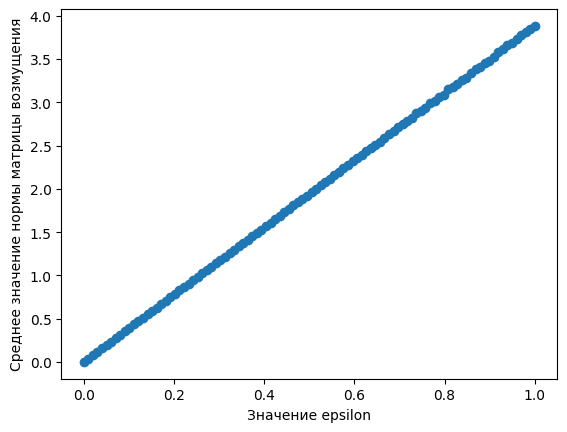

In [4]:
N = 1000 # sampling points
eps = np.linspace(1e-8, 1, 100)
size = (19, 10)
average_norms = []
np.random.seed(42)

for e in eps:
    norms = []
    for _ in range(N):
        M = matrix_generate(size[0], size[1], "disturbed", e)
        norm = np.linalg.norm(M, ord=2) # frobenius norm
        norms.append(norm)
    average_norms.append(np.mean(norms))

plt.scatter(eps, average_norms)
plt.xlabel('Значение epsilon')
plt.ylabel('Среднее значение нормы матрицы возмущения')
plt.show()

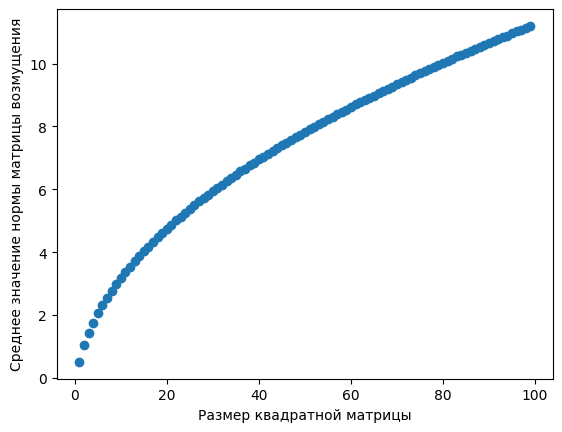

In [ ]:
N = 1000 # sampling points
eps = 1
n = np.arange(1,100)
average_norms = []
np.random.seed(42)

for n_i in n:
    size = (n_i,n_i)
    norms = []
    for _ in range(N):
        M = matrix_generate(size[0], size[1], "disturbed", eps)
        norm = np.linalg.norm(M, ord=2)
        norms.append(norm)
    average_norms.append(np.mean(norms))

plt.scatter(n, average_norms)
plt.xlabel('Размер квадратной матрицы')
plt.ylabel('Среднее значение нормы матрицы возмущения')
plt.show()

In [211]:
N = 1000 # sampling points
np.random.seed(42)
type_ = 'upper_triangular'
size = (4,4)

matrices = list(matrix_generate(size[0], size[1], type_, rank=3) for _ in range(N)) 
svals = np.array(list(np.linalg.svdvals(m) for m in matrices))
min_svals = np.array(list(np.min(v) for v in svals))
num_nonzero = np.count_nonzero(min_svals)
probability = (N - np.count_nonzero(min_svals)) / N

print(f'Probabilty of random {type_} matrix {size[0]}x{size[1]} being singular is: {probability}')

Probabilty of random upper_triangular matrix 4x4 being singular is: 0.0


#### Задание 2 

In [17]:
def vector_norm(x, ord=2):
    x = np.array(x, dtype=float)
    
    if x.ndim != 1:
        raise ValueError("Input must be a vector")
    
    if ord == 1:
        return np.sum(np.abs(x))
    elif ord == 2:
        return np.sqrt(np.sum(x**2))
    elif ord == np.inf:
        return np.max(np.abs(x))
    else:
        raise ValueError(f"Unknown norm order: {ord}")

def matrix_norm(A, ord=2):
    A = np.array(A, dtype=float)
    
    if A.ndim != 2:
        raise ValueError("Input must be a matrix")
    
    if ord == 1:
        return np.max(np.sum(np.abs(A), axis=0))
    elif ord == 2:
        if min(A.shape) == 0:
            return 0.0
        s = svd(A, compute_uv=False)
        return np.max(s)
    elif ord == np.inf:
        return np.max(np.sum(np.abs(A), axis=1))
    elif ord == 'fro':
        return np.sqrt(np.sum(np.abs(A)**2))
    else:
        raise ValueError(f"Unknown norm order: {ord}")

def condition_number(A, ord=2):
    A = np.array(A, dtype=float)
    
    if A.ndim != 2 or A.shape[0] != A.shape[1]:
        raise ValueError("Matrix must be square")
    
    if ord == 'fro':
        if np.linalg.det(A) == 0:
            return np.inf
        try:
            A_inv = np.linalg.inv(A)
            norm_A = matrix_norm(A, 'fro')
            norm_A_inv = matrix_norm(A_inv, 'fro')
            return norm_A * norm_A_inv
        except np.linalg.LinAlgError:
            return np.inf
    else:
        if np.linalg.det(A) == 0:
            return np.inf
        try:
            A_inv = np.linalg.inv(A)
            norm_A = matrix_norm(A, ord)
            norm_A_inv = matrix_norm(A_inv, ord)
            return norm_A * norm_A_inv
        except np.linalg.LinAlgError:
            return np.inf

def norm(x, ord=2):
    x = np.array(x, dtype=float)
    
    if x.ndim == 1:
        return vector_norm(x, ord)
    elif x.ndim == 2:
        return matrix_norm(x, ord)
    else:
        raise ValueError("Input must be a vector or matrix")
    
# можно пж не писать документацию(((((

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def experimental_condition_number(A, num_samples=10000):

    n = A.shape[0]
    
    max_ratio = -np.inf
    min_ratio = np.inf
    
    for _ in range(num_samples):
        x = np.random.randn(n)
        x = x / np.linalg.norm(x)
        
        Ax = A @ x
        ratio = np.linalg.norm(Ax)
        
        if ratio > max_ratio:
            max_ratio = ratio
        if ratio < min_ratio:
            min_ratio = ratio
    
    return max_ratio / min_ratio if min_ratio > 0 else np.inf

np.random.seed(42)
n = 20

A_eye = np.eye(n)
A_random = np.random.randn(n, n)
A_diag = np.diag(1.0 / (np.arange(n) + 1))
A_ill = np.full((n,n), 1) + 5 * np.ones((n, n))

test_matrices = [A_eye, A_random, A_diag, A_ill]
names = ['Единичная', 'Случайная', 'Диагональная', 'Плохо об.']

results = []

for A, name in zip(test_matrices, names):
    cond_analytical = np.linalg.cond(A, 2)
    cond_experimental_1k = experimental_condition_number(A, 1000)
    cond_experimental_10k = experimental_condition_number(A, 10000)
    cond_experimental_100k = experimental_condition_number(A, 100000)
    
    error_1k = abs(cond_analytical - cond_experimental_1k) / cond_analytical * 100
    error_10k = abs(cond_analytical - cond_experimental_10k) / cond_analytical * 100
    error_100k = abs(cond_analytical - cond_experimental_100k) / cond_analytical * 100
    
    results.append({
        'name': name,
        'analytical': cond_analytical,
        'exp_1k': cond_experimental_1k,
        'exp_10k': cond_experimental_10k,
        'exp_100k': cond_experimental_100k,
        'error_1k': error_1k,
        'error_10k': error_10k,
        'error_100k': error_100k
    })
    
    print(f"{name:15} | Аналитич: {cond_analytical:12.2e} | "
          f"1000 samples: {cond_experimental_1k:12.2e} ({error_1k:6.2f}%) | "
          f"10000 samples: {cond_experimental_10k:12.2e} ({error_10k:6.2f}%) | "
          f"100000 samples: {cond_experimental_100k:12.2e} ({error_100k:6.2f}%)")

#### Задание 3

Найдите константы $C_1$ и $C_2$ такие, что

$C_1||x||_2 \leq ||x||_1 \leq C_2||x||_2$

$\boxed{C_2 = \sqrt{n}}$

$\textbf{Доказательство:}$
Применяем неравенство КБШ:
$$
\left( \sum_{i=1}^n |x_i| \right)^2 \leq \left( \sum_{i=1}^n 1^2 \right) \left( \sum_{i=1}^n |x_i|^2 \right) = n \cdot \|x\|_2^2.
$$
Извлекая квадратный корень:
$
\|x\|_1 \leq \sqrt{n} \cdot \|x\|_2.
$

Константа $\sqrt{n}$ оптимальна, так как для $x = (1, 1, \dots, 1)$ достигается равенство.

$\boxed{C_1 = 1}$

$\textbf{Доказательство:}$
$$
\|x\|_1^2 = \left( \sum_{i=1}^n |x_i| \right) ^2 \geq \sum_{i=1}^n |x_i|^2 = \|x\|_2^2
$$
поскольку квадрат суммы не меньше суммы квадратов

Для вектора $x = (1, 0, \dots, 0)$ выполняется
$
\|x\|_1 = 1 = \|x\|_2,
$

#### Задание 4 

$\boxed{\|x\|_2 \leq \sqrt{m} \cdot \|x\|_\infty}$

$\textbf{Доказательство:}$
Пусть $x = (x_1, x_2, \dots, x_m)$. Тогда для каждого i выполняется $|x_i| \leq \|x\|_\infty$, поэтому
$$
\sum_{i=1}^m |x_i|^2 \leq m \cdot (\|x\|_\infty)^2.
$$
Извлекая квадратный корень, получаем требуемое.

$\textbf{Пример равенства:}$ $x = (1, 1, \dots, 1)$.

$\boxed{\|A\|_\infty \leq \sqrt{n} \cdot \|A\|_2}$

$\textbf{Доказательство:}$
Заметим, что $\|A\|_\infty = \max_{1 \leq i \leq m} \|e_i^T A\|_1$. Для любого вектора v длины n верно $\|v\|_1 \leq \sqrt{n} \cdot \|v\|_2$, поэтому
$$
\|e_i^T A\|_1 \leq \sqrt{n} \cdot \|e_i^T A\|_2 \leq \sqrt{n} \cdot \|A\|_2.
$$
Взяв максимум по i, получаем неравенство.

$\textbf{Пример равенства:}$ Матрица-строка из единиц $A = \begin{pmatrix} 1 & 1 & \dots & 1 \end{pmatrix}$.

#### Задание 5

$$\|A \|_F = \sqrt{\sum_{i=1}^m |\textbf{a}_i|^2}$$

Где $a_i - $ столбцы матрицы A

$$\| U A \|_F = \sqrt{\sum_{i=1}^m |U \textbf{a}_i|^2} = \sqrt{\sum_{i=1}^m (U\textbf{a}_i, U\textbf{a}_i)} \overset{\text{U - унитарная}}{:=} \sqrt{\sum_{i=1}^m (\textbf{a}_i, \textbf{a}_i)} = \sqrt{\sum_{i=1}^m |\textbf{a}_i|^2} = \|A \|_F$$

Но так как $\|M \|_F = \|M^* \|_F$, то:

$$ \| A U\|_F = \| (A U)^* \|_F = \|U^* A^* \|_F = \|V A^* \|_F \overset{\text{V - унитарная}}{=} \|A \|_F$$

Ч.т.д.